<a href="https://colab.research.google.com/github/thomas-e-jung/Mobility-LLM/blob/main/Mobility_LLM_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Mobility-LLM: Learning Visiting Intentions and Travel Preference from Human Mobility Data with Large Language Models

#### Members' Names or Individual's Name: Thomas Jung, Kishan Vasudevan

####  Emails: e1jung@torontomu.ca, kvasudevan@torontomu.ca

# Introduction:

#### Problem Description:
How to effectively understand and predict human movement patterns, visiting intentions, and travel preferences using Large Language Models (LLMs).

#### Context of the Problem:

Understanding human mobility patterns is crucial for a wide range of applications, including urban planning, transportation optimization, location-based services, and personalized travel recommendations. Addressing this problem is essential for creating more efficient, user-centric, and intelligent mobility solutions that benefit individuals, businesses, and urban infrastructure as a whole.

#### Limitation About other Approaches:
Traditional mobility prediction methods often do not take semantic values into consideration when training the models so there is often a disconnect as to what behavioural connections can be made based on the given inputs. Also, traditional methods often are too generalized and can make the results not easily transferable across more detailed datasets.

#### Solution:

With the rapid advancements in Large Language Models (LLMs), there is an opportunity to leverage these models to better analyze, interpret, and predict mobility behaviors. By incorporating contextual information and learning patterns from vast amounts of human mobility data, LLMs can provide more adaptive, personalized, and intelligent mobility insights.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Fang et al. [1] | They trained a BERT based transformer to make a self-supervised model that is pre-trained for spatiotemporal trajectory data. This paper introduces trajectory-based pretraining, like how Mobility-LLM embeds spatiotemporal intent; useful for architectural comparison.| Large-scale spatial-temporal trajectory datasets, including GPS traces and check-in data | While effective in capturing spatial-temporal patterns, GeoTS may not explicitly model users' visiting intentions or preferences, which are crucial for understanding human mobility behaviors
| Feng et al. [2] | 	Focuses on next location prediction using deep learning models like RNNs and LSTMs to capture sequential patterns in user check-in data.| User check-in sequences from LBS platforms | Primarily captures spatiotemporal patterns without delving into the semantic intentions behind user movements
| Gao et al. [3] | Addresses trajectory-user linking by matching anonymous trajectories to known users based on movement patterns.| Anonymized trajectory data | Lacks consideration of the semantic context or reasons behind user movements, focusing solely on pattern matching.
| Gong et al. [4] | Proposes a unified framework leveraging LLMs to analyze check-in sequences, incorporating a Visiting Intention Memory Network (VIMN) and Human Travel Preference Prompts (HTPP) to capture semantic aspects of human mobility.| Check-in sequences from LBS platforms, including POI information and timestamps. | The model's learned information about POIs is not easily transferable across datasets due to unique POI sets in different regions. Future work aims to develop universal user and POI embeddings to enhance cross-dataset migration and improve model versatility.


# Methodology






In this project, we implemented the Mobility-LLM framework introduced by Gong et al. [4], which is designed for semantic analysis of user check-in sequences using pre-trained LLMs. This method enables the model to infer visiting intentions and travel preferences, supporting the downstream tasks of next-location prediction, time prediction, and user identification.

The framework consists of three key modules (which are visualized in Figure 1):

**POI Point-wise Embedding Layer (PPEL)**: This module generates semantic embeddings for each point of interest (POI) by combining its ID and associated category information. A point-wise attention mechanism aligns these POIs with meaningful category word embeddings.

**Visiting Intention Memory Network (VIMN)**: VIMN captures the user's temporal behavior patterns using a customized GRU that accounts for both periodicity and time intervals between check-ins. It outputs intention vectors that reflect the purpose behind each visit.

**Human Travel Preference Prompting (HTPP)**: This module selects prompts from a shared pool across the three main domains being examined. These domeains are occupation, activity type, and lifestyle. The selected prompts help the LLM better interpret user behavior and personalize predictions. Figure 2 visualizes this process making it easier to follow.

These modules feed into a partially fine-tuned LLM, which generates outputs used to perform the downstream tasks.

The overall structure of the implemented method is shown in the following:



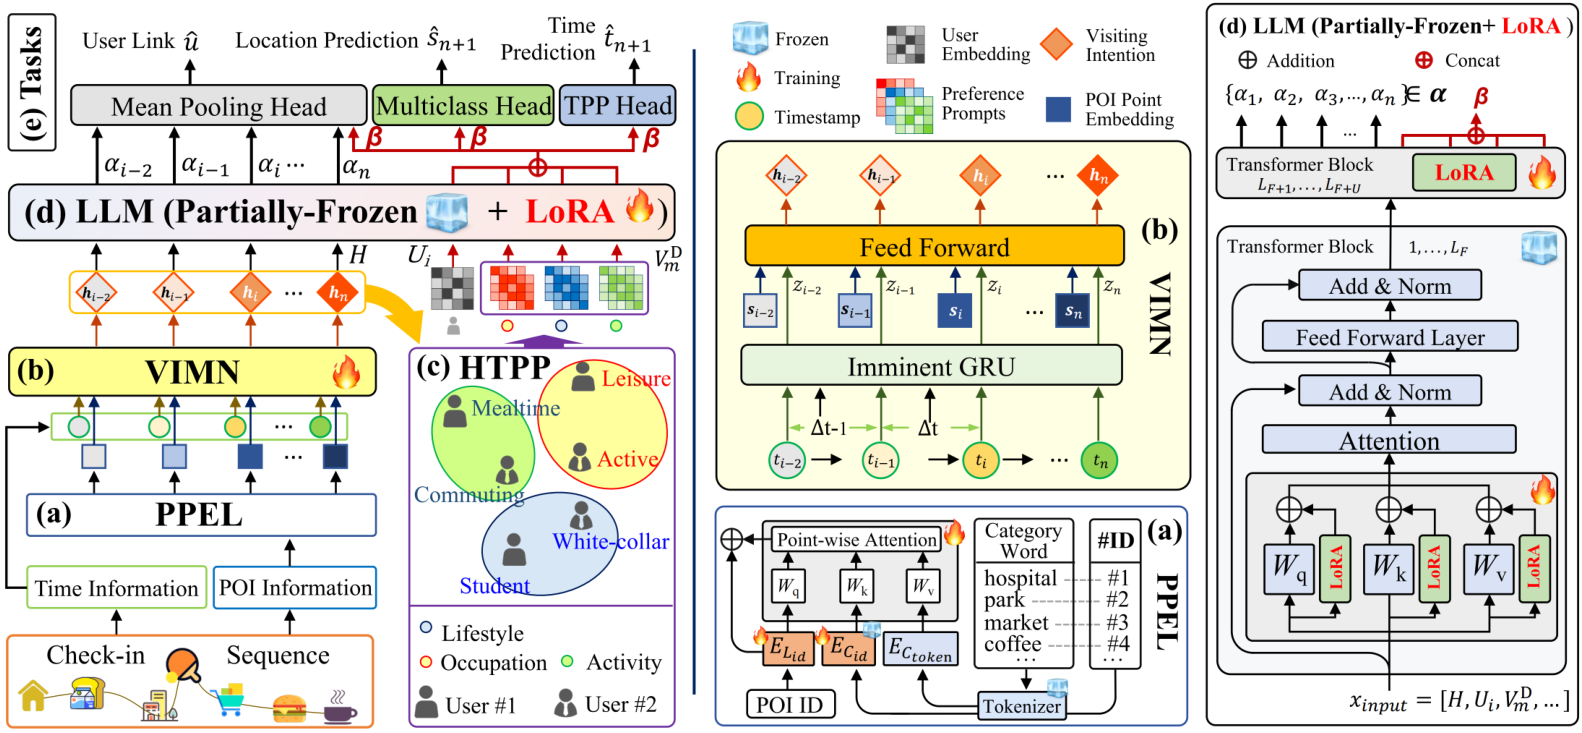

**Figure 1:** The overall of our Mobility-LLM framework. a) POI Point-wise Embedding Layer (PPEL). b) Visiting Intention Memory Network (VIMN). c) Human Travel Preference Prompt (HTPP). d)  $\mathbf{\alpha}$ denotes the output of the LLM corresponding to VIMN (i.e. first n output of the LLM), while the remaining outputs are denoted as $\mathbf{\beta}$.


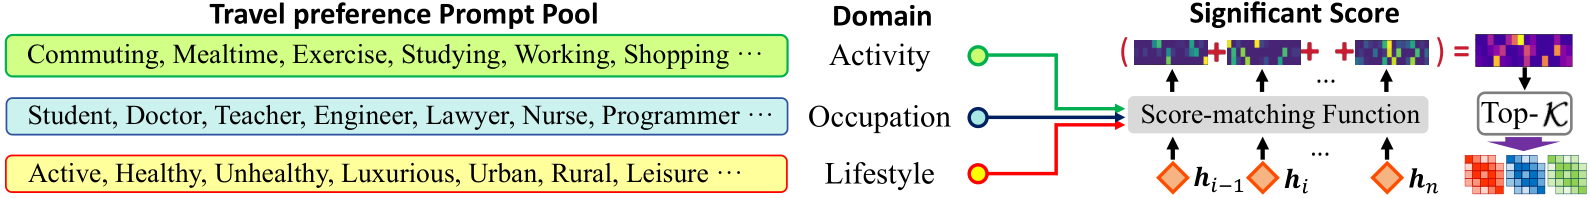

**Figure 2: The architecture of HTPP**

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

## Overview
The bulk of the codebase is in the dozens of .py files in the Mobility-LLM GitHub repo. This notebook simply downloads the required files and calls the main script train_MobilityLLM.py in the shell using appropriate training parameters.

The cells in the "Train (fine-tune) and test LLMs" section will call the main script 'train_MobilityLLM.py' which imports the dependencies and preprocesses the datasets. The 'MobilityLLM.py' script is then called, which takes the pretrained LLMs and performs fine-tuning using the LoRA Parameter Efficient Fine Tuning (PEFT) method.

This results in an output of the evaluation metrics on the test set as well as the new fine-tuned parameters to be used for downstream tasks.

## Clone Mobility-LLM repo

In [ ]:
!git clone -q https://github.com/thomas-e-jung/Mobility-LLM.git
# Change working directory to cloned folder
%cd Mobility-LLM/src

## Download LLMs for fine-tuning
### May take a few minutes per model.

Models compatible with codebase:
- TinyLlama (TinyLlama-1_1B)
- TinyLlama-Chat (TinyLlama-Chat)
- phi-2 (phi-2)
- pythia-70M (pythia-70M)
- pythia-2.8B (pythia-2_8B)
- pythia-1B (pythia-1B)
- LiteLlama (LiteLlama)
- GPT-2 (gpt2)


Instructions:
1. Find model on www.huggingface.co/models.
2. Get account_name/model_name. E.g. EleutherAI/pythia-70m
3. Add to cell below after the echo command, replacing slash with space and separating each model with a space.

E.g. !echo EleutherAI pythia-70m microsoft phi-2 | xargs ...

In [ ]:
# Remove unnecessary subfolders in cloned repo
!rm -r ./params

# Take two arguments at a time from a space-delimited string (account_name, model_name) and pass them to the git clone shell command to save model from HuggingFace as local files
# !echo EleutherAI pythia-70m microsoft phi-2 EleutherAI pythia-1b EleutherAI pythia-2.8b openai-community gpt2 | xargs -n2 sh -c 'git clone -q https://huggingface.co/$1/$2 ./params/$2' sh
!echo EleutherAI pythia-70m | xargs -n2 sh -c 'git clone -q https://huggingface.co/$1/$2 ./params/$2' sh

For each model, rename cloned folder names to match names in brackets in list of compatible models above. Names are case sensitive!

In [ ]:
!mv ./params/pythia-70m ./params/pythia-70M   # change lowercase 'm' to uppercase

## Download dataset for training/testing
### May take 1-2 minutes

In [ ]:
# Download dataset from Google Drive folder
!gdown --folder -q https://drive.google.com/drive/folders/1HX-l88OuwUfmNqW55kiSfXwtqonfCZhl -O ./data/new_datasets

In [ ]:
%pip install -U -q nni
%pip install --force-reinstall -q "transformers<4.45.0"

## Train (fine-tune) and test LLMs
For each of the three downstream tasks:
1. Location Prediction (LP): predict user’s future location based on their historical movement
2. Trajectory User Link (TUL): link anonymous trajectories to users who created them
3. Time Prediction (TPP): estimate time at which user will likely visit their next location

Only three runs are shown below: 1 model (pythia-70M) on each of the 3 tasks using 1 dataset (Brightkite).

See README for instructions on running with 4 different datasets and 8 different pretrained LLMs.

### Location Prediction (LP)

--config: config file with training parameters

--dataroot: location of dataset

--model_class: type of pretrained model


In [ ]:
!python train_MobilityLLM.py --config config/MobilityLLM_tky_POI.conf --dataroot data/ --model_class pythia-70M

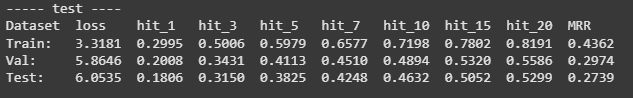

### Trajectory User Link (TUL)

In [ ]:
!python train_MobilityLLM.py --config config/MobilityLLM_tky_TUL.conf --dataroot data/ --model_class pythia-70M

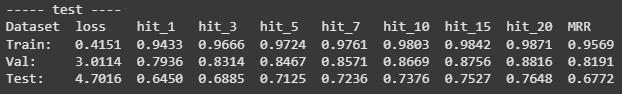

### Time Prediction (TPP)

In [ ]:
!python train_MobilityLLM.py --config config/MobilityLLM_tky_TPP.conf --dataroot data/ --model_class pythia-70M

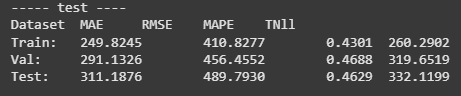

# Conclusion and Future Direction

Write what you have learnt in this project. In particular, write few sentences about the results and their limitations, how they can be extended in future. Make sure your own inference/learnings are depicted here.

In this project, we learned how large language models can be fine-tuned to understand the semantics behind users' visiting intentions and travel preferences based on their check-in data. The Mobility-LLM framework allows for the fine-tuning of pretrained models using check-in datasets to better understand prompts related to users' travel preferences. This allows aspects of the inputs to be more closely linked to users' intentions on visiting certain places and their travel preferences. This helped us understand how tasks like predicting the next location a person might go or when they might move there can be made more accurate and personalized, allowing for better user experiences and urban management.

While the evaluation showed the model having high performance, there were some challenges. The model needs good quality data about places, which isn’t always available or consistent across different locations. This was a common issue amongst the papers we reviewed exploring similar topics with spatiotemporal data. This is an important issue since the prompts and preferences used by the model might not work as well when applied to new datasets. In the future, the method could be improved by using more flexible place descriptions and better ways to adapt the model to new users or cities. Also, since the authors have not investigated prompt engineering use cases, future work can be done to evaluate this new framework at the downstream task level using LLM evaluation metrics such as perplexity and ROUGE. Overall, this project helped us understand how LLMs can make sense of real-world user behavior in a more thoughtful and human-like way.

# References:

[1]: Fang, Y., Zeng, Z., Zhang, D., Li, G., & Li, J. (2023).
     "GeoTS: Pretraining with Spatial–Temporal Trajectories for Deep Location Understanding.

[2]: Jie Feng, Yong Li, Chao Zhang, Funing Sun, Fanchao Meng, Ang Guo, and
     Depeng Jin. Deepmove: Predicting human mobility with attentional recurrent networks. In Proceedings of the 2018 world wide web conference, pages 1459–1468, 2018

[3]: Qiang Gao, Fan Zhou, Kunpeng Zhang, Goce Trajcevski, Xucheng Luo, and      
     Fengli Zhang. Identifying human mobility via trajectory embeddings. In IJCAI, volume 17, pages 1689–1695, 2017.

[4]: Gong, M., Wu, Y., Zhang, Q., Wang, Y., Xu, Z., Deng, H., Hu, R., Li, C., &
     Zheng, Y. (2023). Mobility-LLM: Learning Visiting Intentions and Travel Preference from Human Mobility Data with Large Language Models. Advances in Neural Information Processing Systems (NeurIPS).